# Visualización del DataSet: IMDB 5000 Movie

Este notebook se va a estructurar de la siguiente manera:
1. Carga del dataset
2. Visualizaciones interesantes

## 1. Carga del dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

df = pd.read_csv("../data/imdb_5000_movies_limpio.csv")

## 2. Visualizaciones interesantes

### 2.1. Frecuencia de películas por Imdb Score

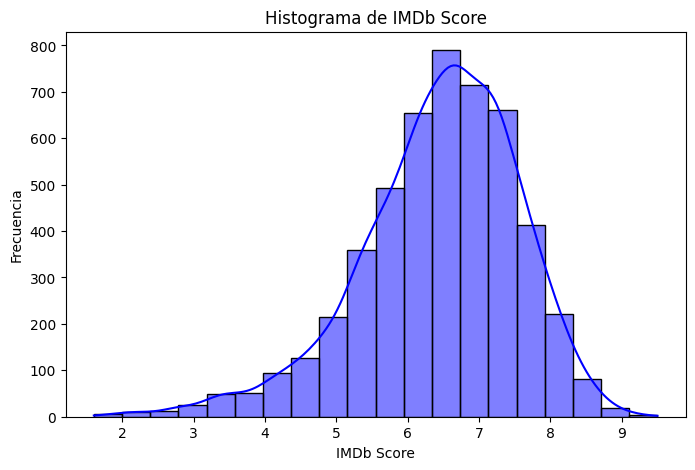

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Imdb Score"], bins=20, kde=True, color="blue")
plt.title("Histograma de IMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("Frecuencia")
plt.show()

### 2.2. Actores protagonistas que más gustan

In [ ]:
actores_protagonistas = df[["Actor 1 Name", "Actor 1 Facebook Likes"]]
likes_actores = actores_protagonistas.groupby("Actor 1 Name")["Actor 1 Facebook Likes"].mean().sort_values(ascending=False).head(10)
likes_actores

Actor 1 Name
Johnny Depp          1600000
Robin Williams       1323000
Robert De Niro       1078000
Matthew Ziff          780000
J.K. Simmons          744000
Jimmy Bennett         696000
Jason Statham         650000
Darcy Donavan         640000
Leonardo DiCaprio     609000
Ryan Gosling          561000
Name: Actor 1 Facebook Likes, dtype: int64

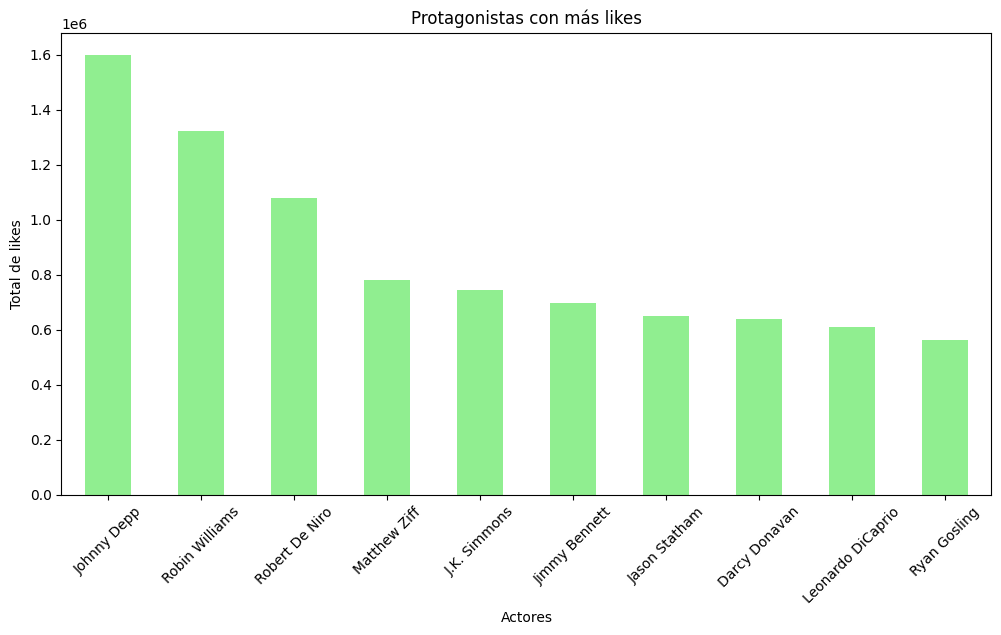

In [9]:
plt.figure(figsize=(12,6))
likes_actores.plot(kind='bar', color='lightgreen')
plt.title('Protagonistas con más likes')
plt.xlabel('Actores')
plt.ylabel('Total de likes')
plt.xticks(rotation=45)
plt.show()

### 2.3. Frecuencia de películas por género

Extraemos los generos para que computen por seperado y no como grupo

In [ ]:
generos = df['Genres'].str.split('|').explode().value_counts()

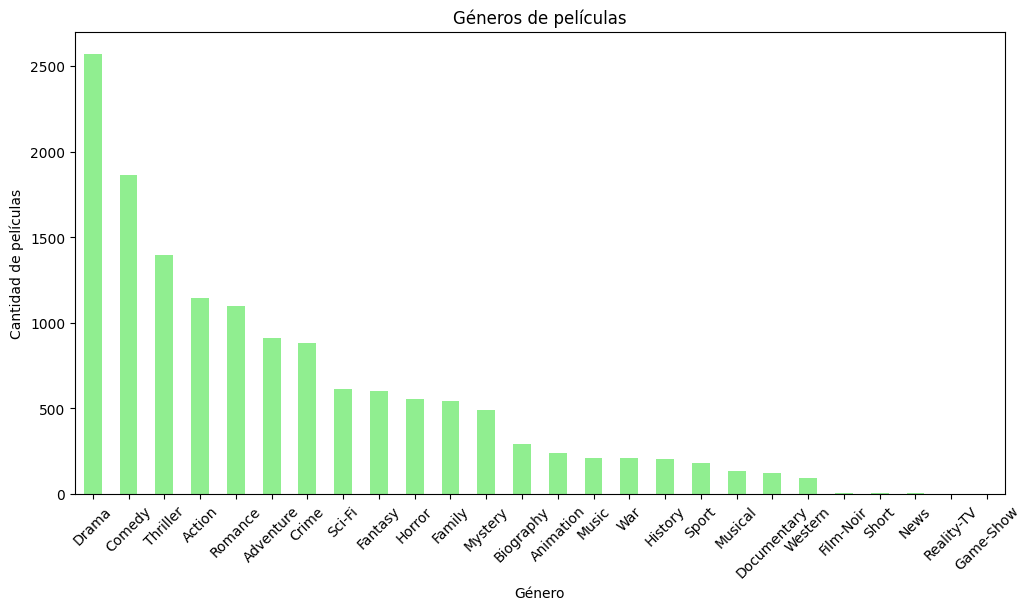

In [ ]:
plt.figure(figsize=(12,6))
generos.plot(kind='bar', color='lightgreen')
plt.title('Géneros de películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()

### 2.4. Evolución del promedio de IMDb Score por género

Obtener generos y filtrar por los más frecuentes para que se pueda entender el gráfico

In [ ]:
df_genres = df.assign(Genre=df['Genres'].str.split('|')).explode('Genre')
top_generos = df_genres['Genre'].value_counts().head(5).index

Guardar el promedio por género

In [ ]:
promedios = []
for genero in top_generos:
    temp = df[df['Genres'] == genero].groupby('Title Year')['Imdb Score'].mean().reset_index()
    temp['Genres'] = genero
    promedios.append(temp)
promedios_df = pd.concat(promedios, ignore_index=True)

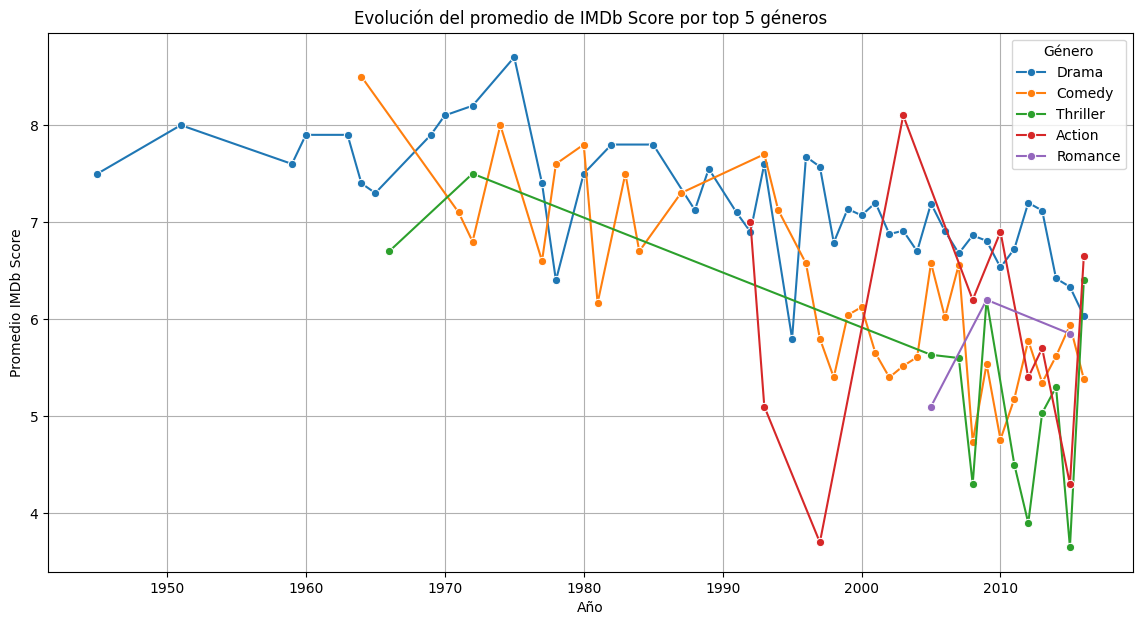

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=promedios_df, x='Title Year', y='Imdb Score', hue='Genres', marker='o')

plt.title(f'Evolución del promedio de IMDb Score por top 5 géneros')
plt.xlabel('Año')
plt.ylabel('Promedio IMDb Score')
plt.legend(title='Género')
plt.grid(True)
plt.show()

### 2.5. Comparativa entre el beneficio medio y el beneficio acumulado del top 5 directores 

¿Quién es el director más rentable?

Se calcula el beneficiio de cada película sabiendo su recuadación y su presupuesto

In [ ]:
df["Profit"] = df["Gross"] - df["Budget"]

Se agrupa por director para sumar beneficios de todas sus películas

In [ ]:
directores_profit = df.groupby('Director Name')['Profit'].sum()
sum = directores_profit.sort_values(ascending=False).head(5)
directores_profit = df.groupby('Director Name')['Profit'].mean()
mean = directores_profit.sort_values(ascending=False).head(5)
# sum_mean = pd.concat([sum, mean])

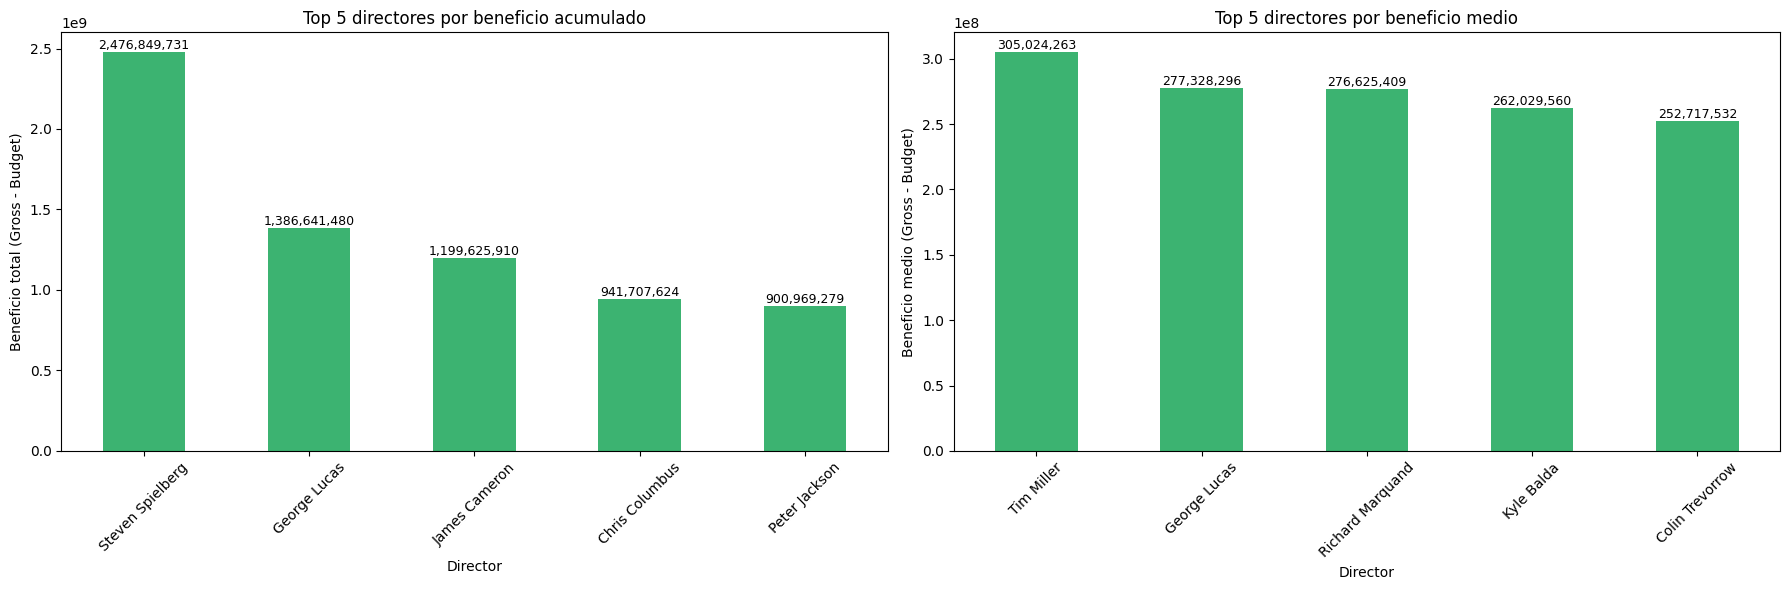

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))   # 1 fila, 2 columnas

# --- SUBGRAFICO 1: Beneficio total ---
sum.plot(kind='bar', color='mediumseagreen', ax=axes[0])
axes[0].set_title('Top 5 directores por beneficio acumulado')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Beneficio total (Gross - Budget)')
axes[0].tick_params(axis='x', rotation=45)


# --- SUBGRAFICO 2: Beneficio medio ---
mean.plot(kind='bar', color='mediumseagreen', ax=axes[1])
axes[1].set_title('Top 5 directores por beneficio medio')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Beneficio medio (Gross - Budget)')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas
for i, value in enumerate(sum):
	axes[0].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)
for i, value in enumerate(mean):
	axes[1].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()